# <span style='color:#577A82'>PROJET - Segmentez des clients d'un site e-commerce </span>

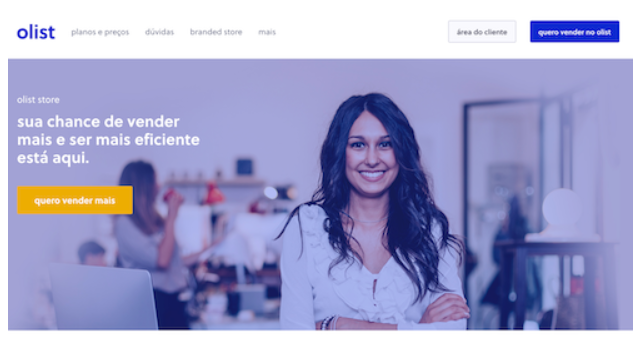

## <span style=''>1. Introduction</span>

*****
**Définir la problématique**
*****
Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne. <br><br>
Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

*****
**Objectifs**
*****
- Comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.
 
- Fournir à l’équipe marketing une description actionable de notre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

*****
**Sources de données**
*****
- Olist nous fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

*****
**Mission**
*****
Notre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. pour cela nous utiliserons donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.


 

# Chargement des librairies

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import missingno as msno

Le schéma de données est représenté par la figure suivante :

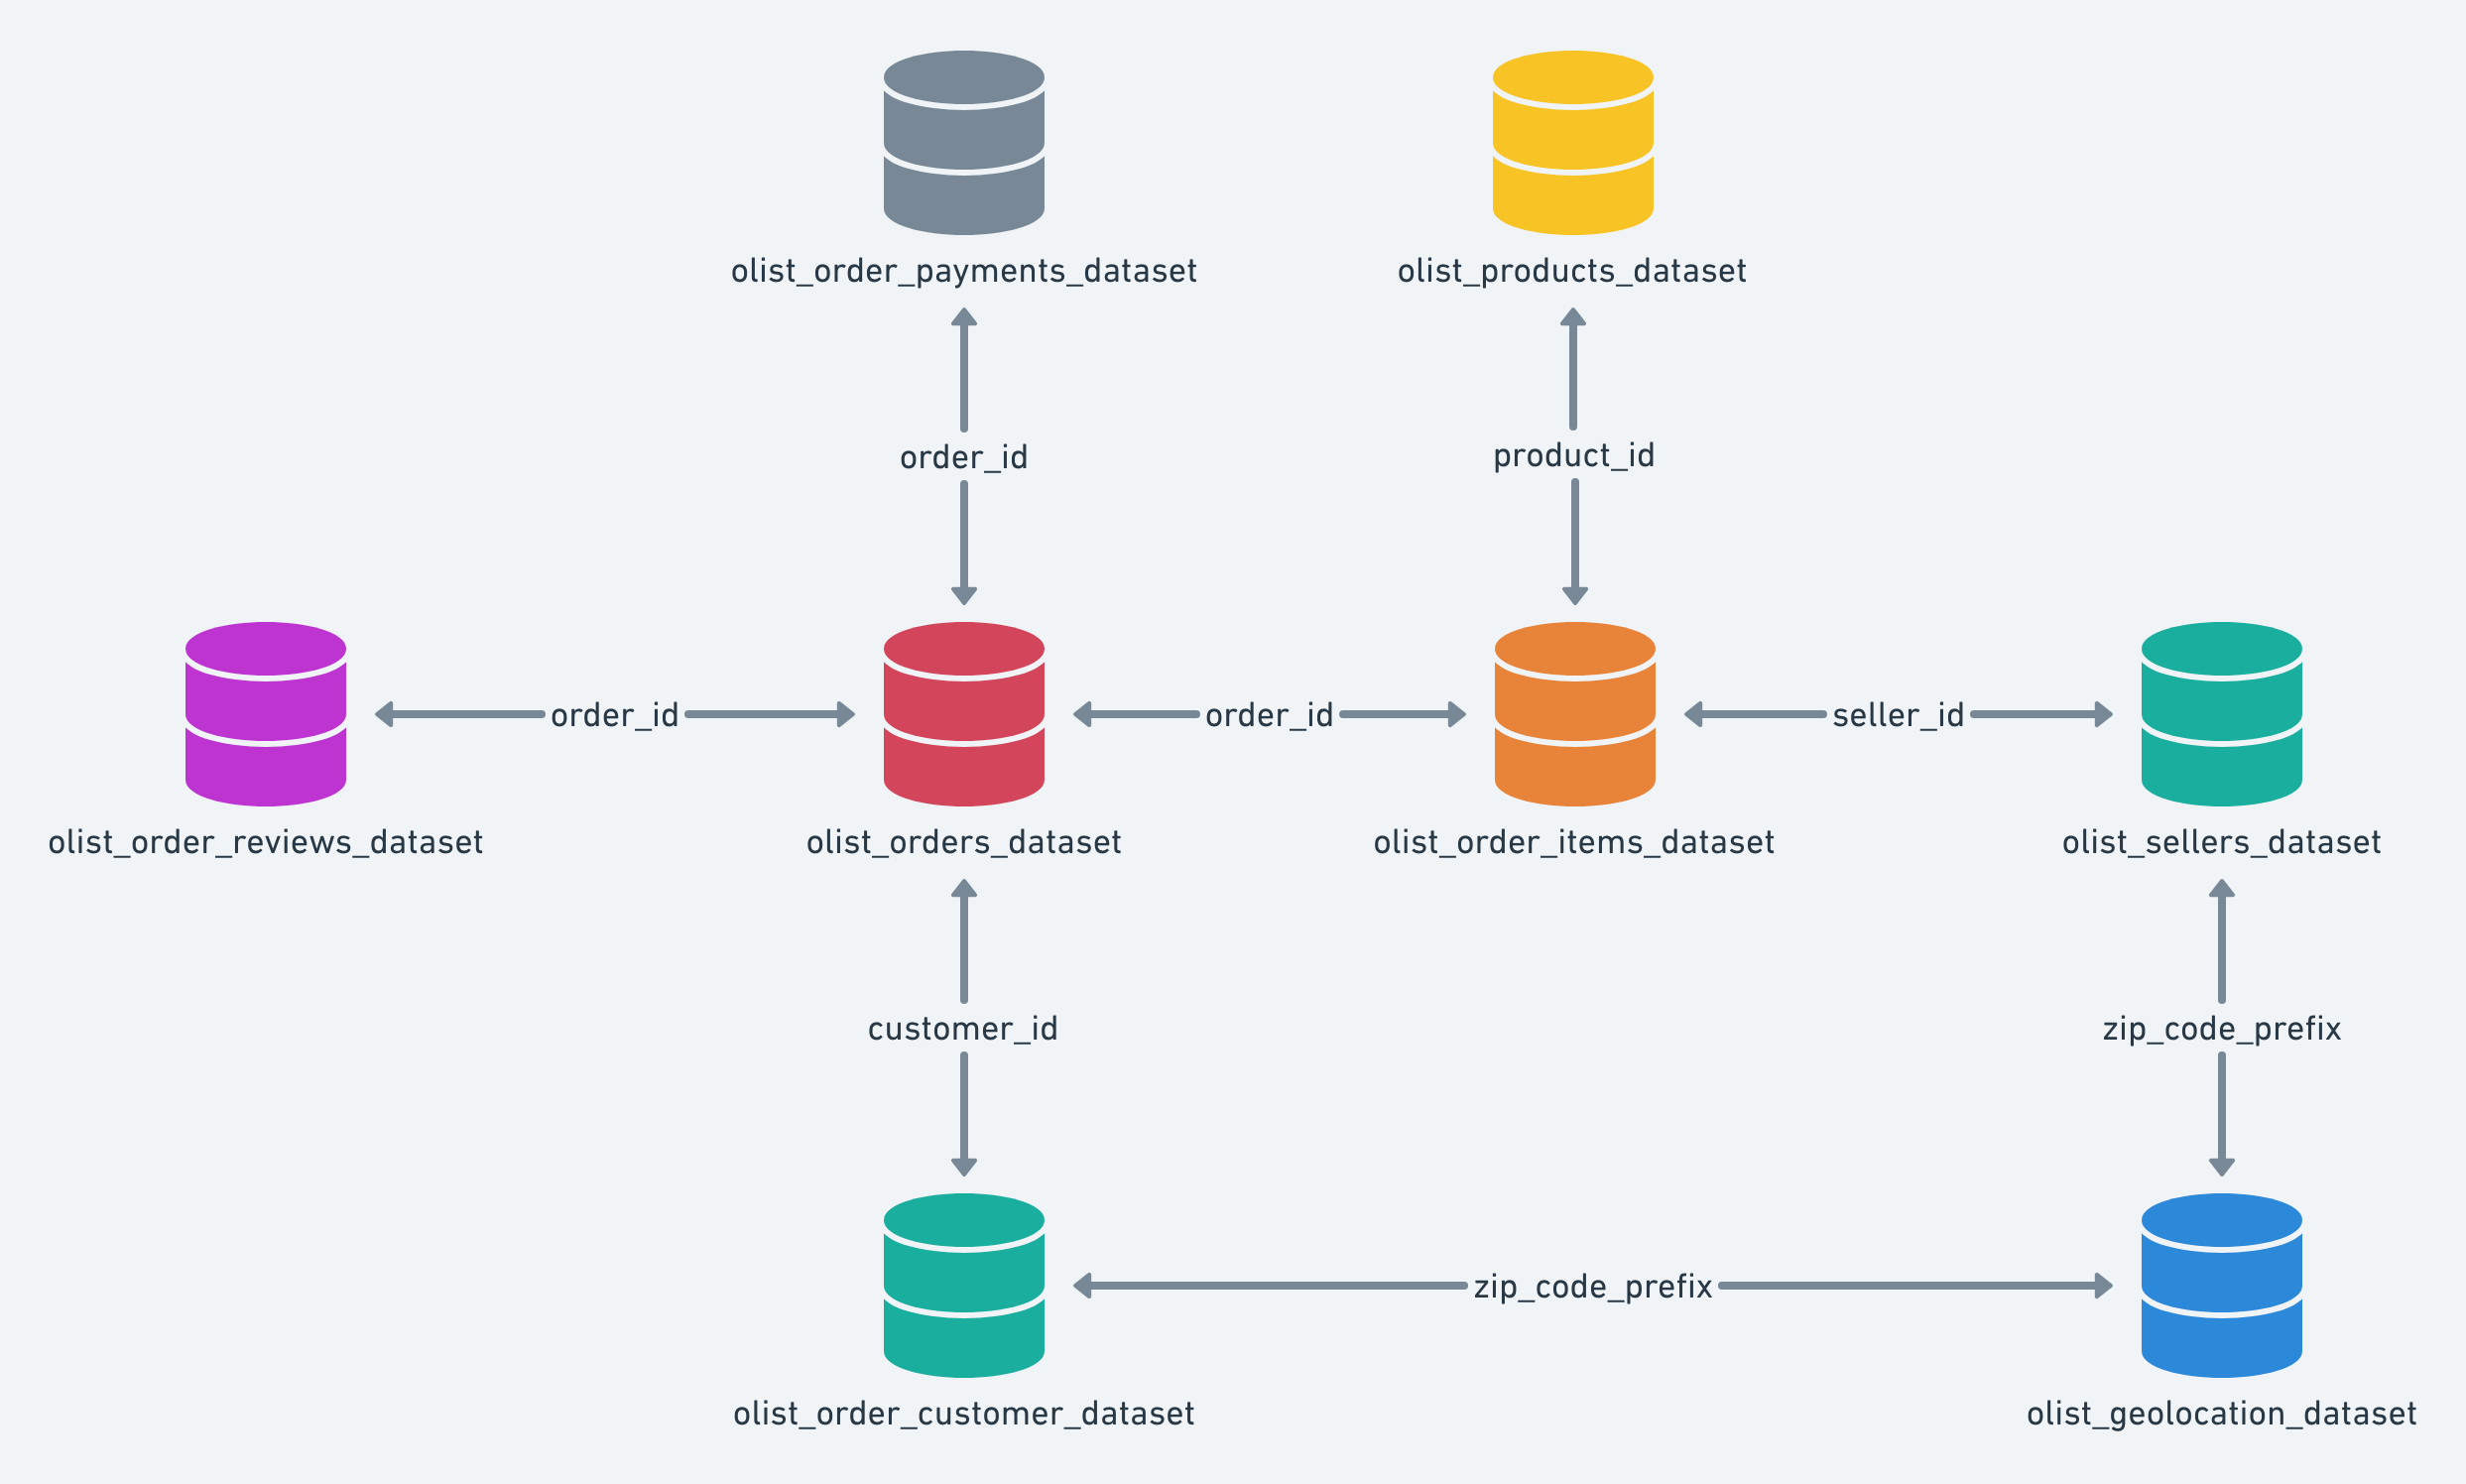

Le client nous fournit une base de données anonymisée comportant des informations sur l'historique de commandes, les produits achetés, les commentaires de satisfaction et la localisation des clients.

In [4]:
customers = pd.read_csv('C:/Users/lenovo/Olist/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('C:/Users/lenovo/Olist/olist_geolocation_dataset.csv')
order_items = pd.read_csv('C:/Users/lenovo/Olist/olist_order_items_dataset.csv')
order_payments = pd.read_csv('C:/Users/lenovo/Olist/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('C:/Users/lenovo/Olist/olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('C:/Users/lenovo/Olist/olist_orders_dataset.csv')
products = pd.read_csv('C:/Users/lenovo/Olist/olist_products_dataset.csv')
sellers = pd.read_csv('C:/Users/lenovo/Olist/olist_sellers_dataset.csv')
translation = pd.read_csv('C:/Users/lenovo/Olist/product_category_name_translation.csv')

Après avoir importé les tables, nous allons afficher les 5 premières lignes pour chaque table afin d'avoir une notion de leur contenu :

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.shape

(99441, 5)

<AxesSubplot:>

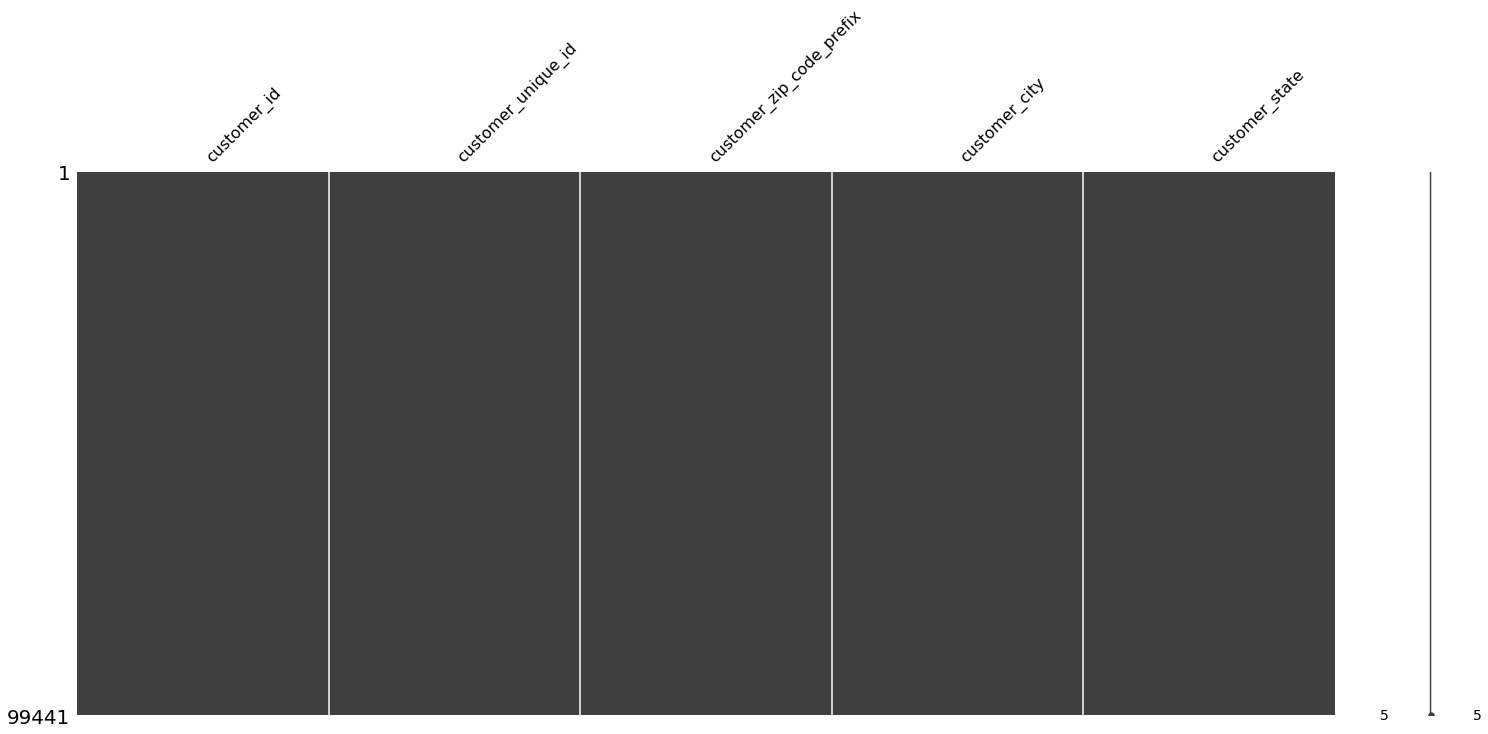

In [7]:
msno.matrix(customers)

In [8]:
geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [9]:
geolocalisation.shape

(1000163, 5)

<AxesSubplot:>

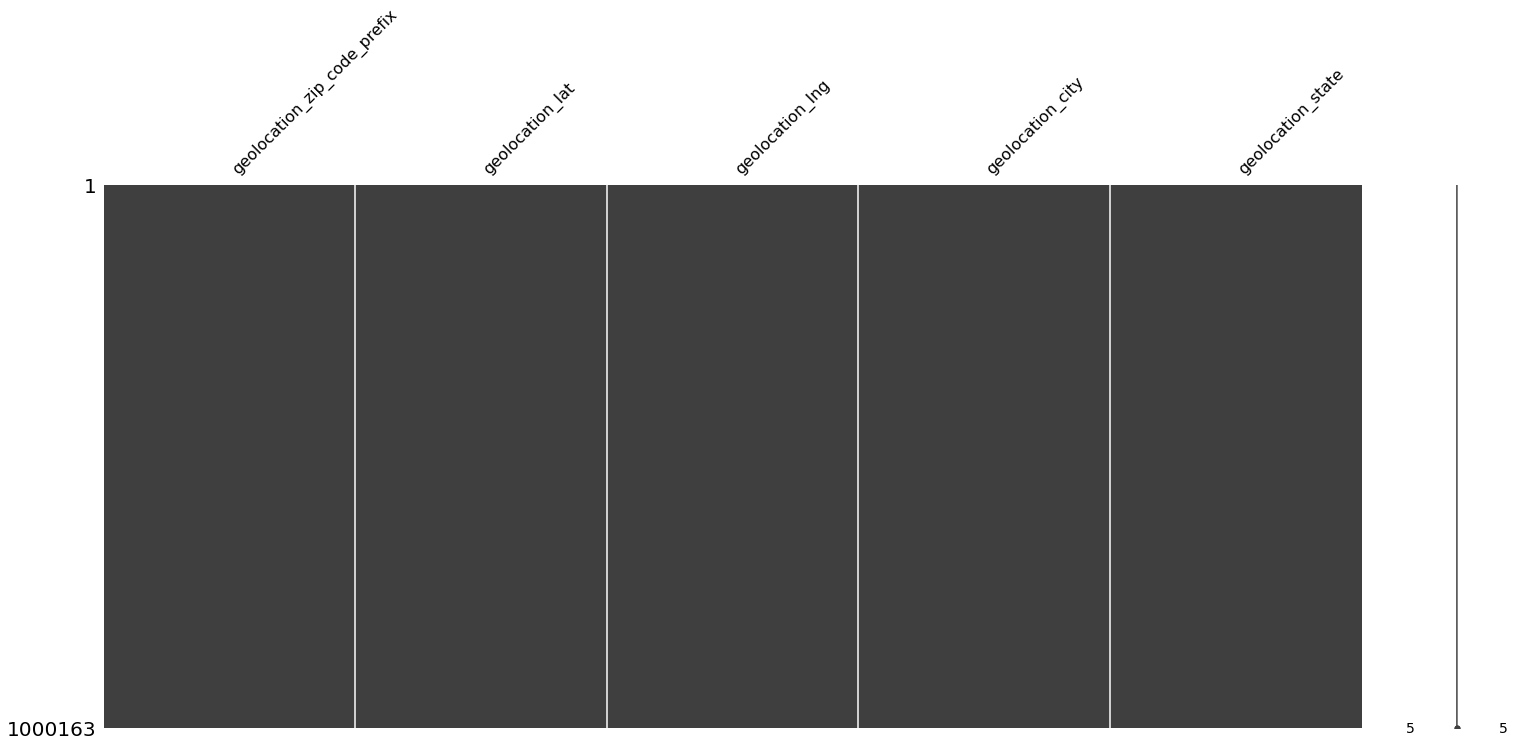

In [10]:
msno.matrix(geolocalisation)

In [11]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_items.shape

(112650, 7)

<AxesSubplot:>

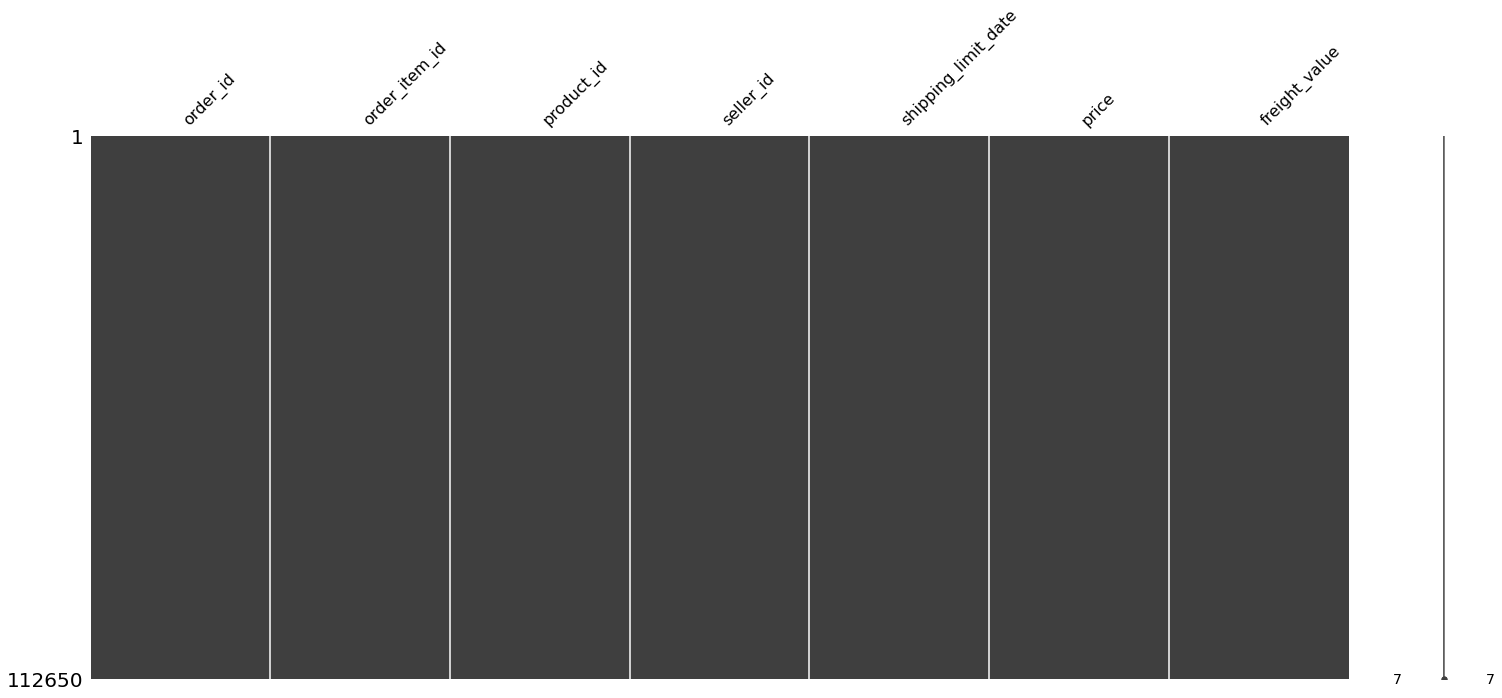

In [13]:
msno.matrix(order_items)

In [14]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
order_payments.shape

(103886, 5)

<AxesSubplot:>

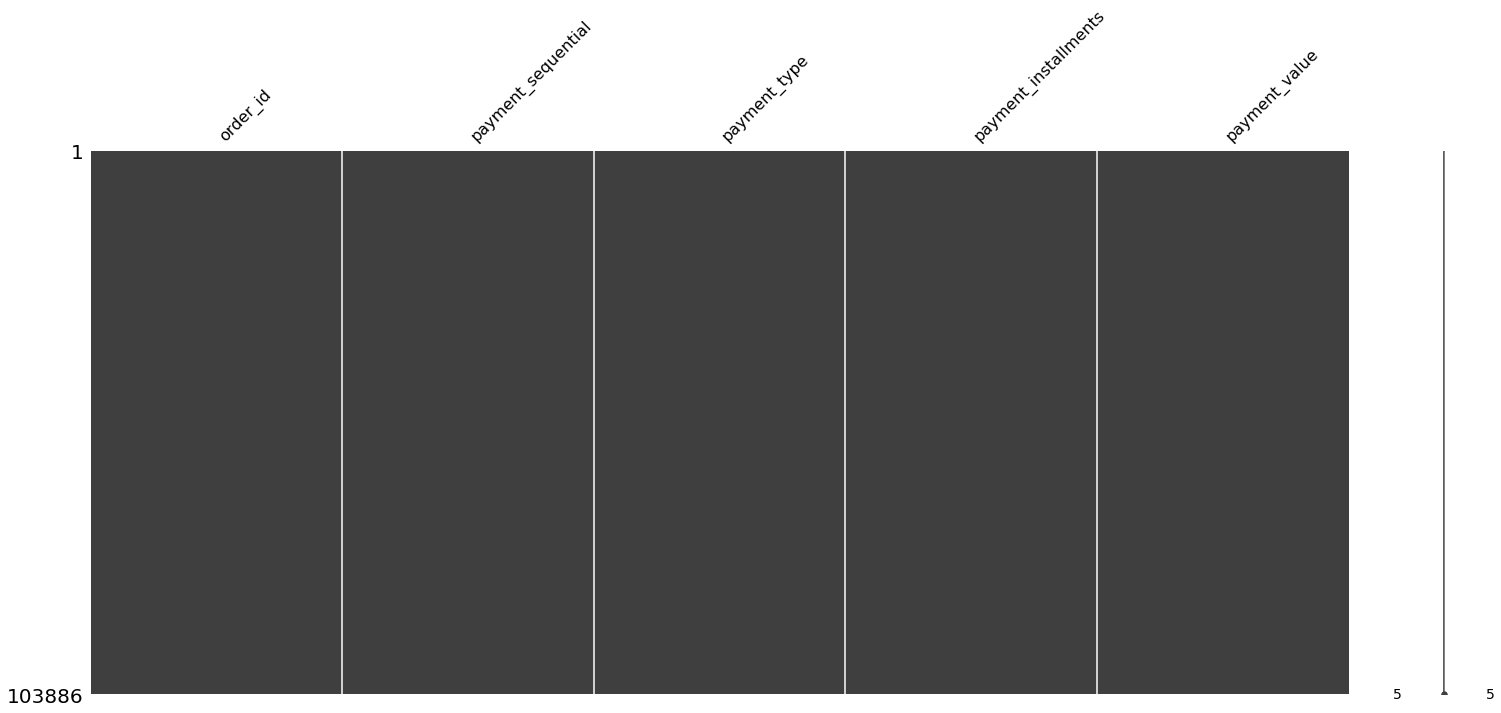

In [16]:
msno.matrix(order_payments)

In [17]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
order_reviews.shape

(99224, 7)

<AxesSubplot:>

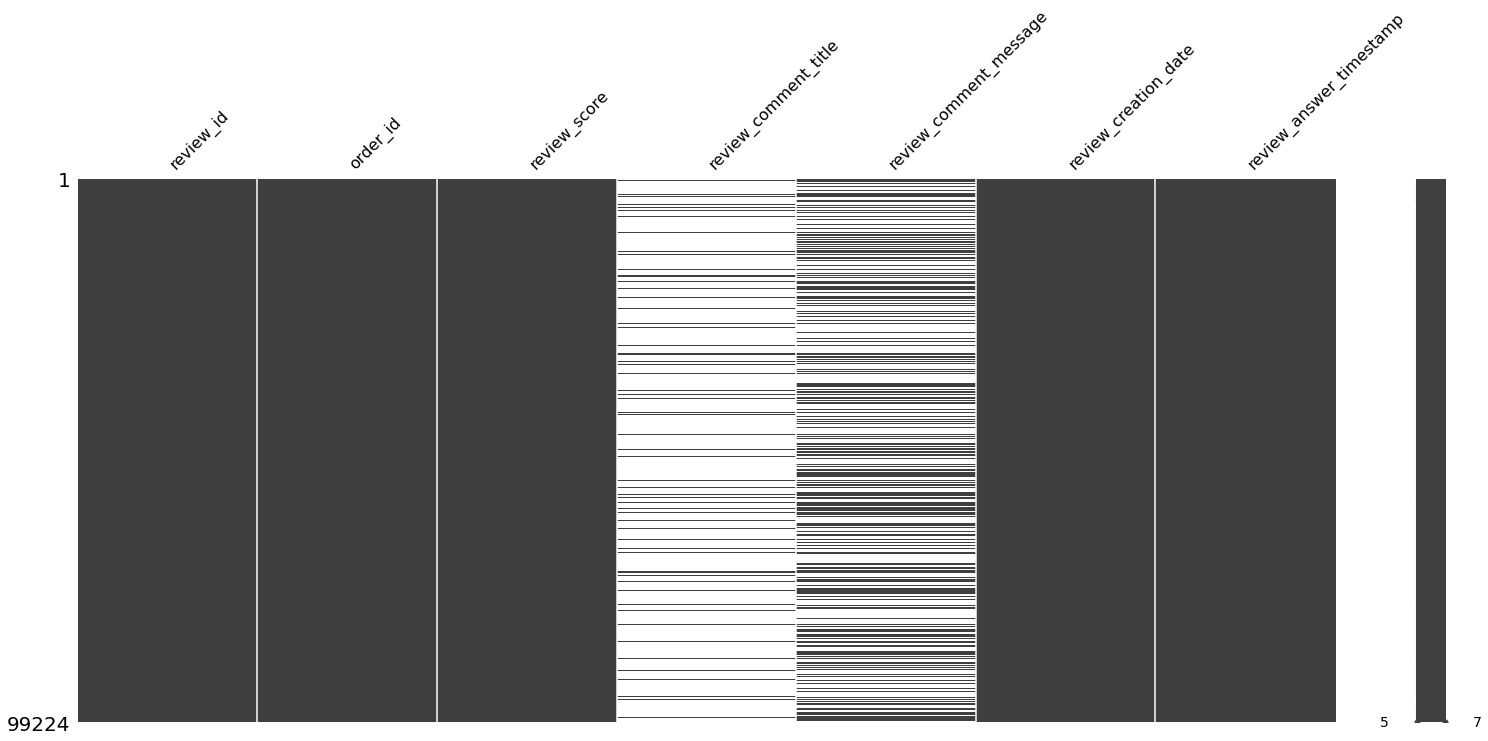

In [19]:
msno.matrix(order_reviews)

In [20]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
df_orders.shape

(99441, 8)

<AxesSubplot:>

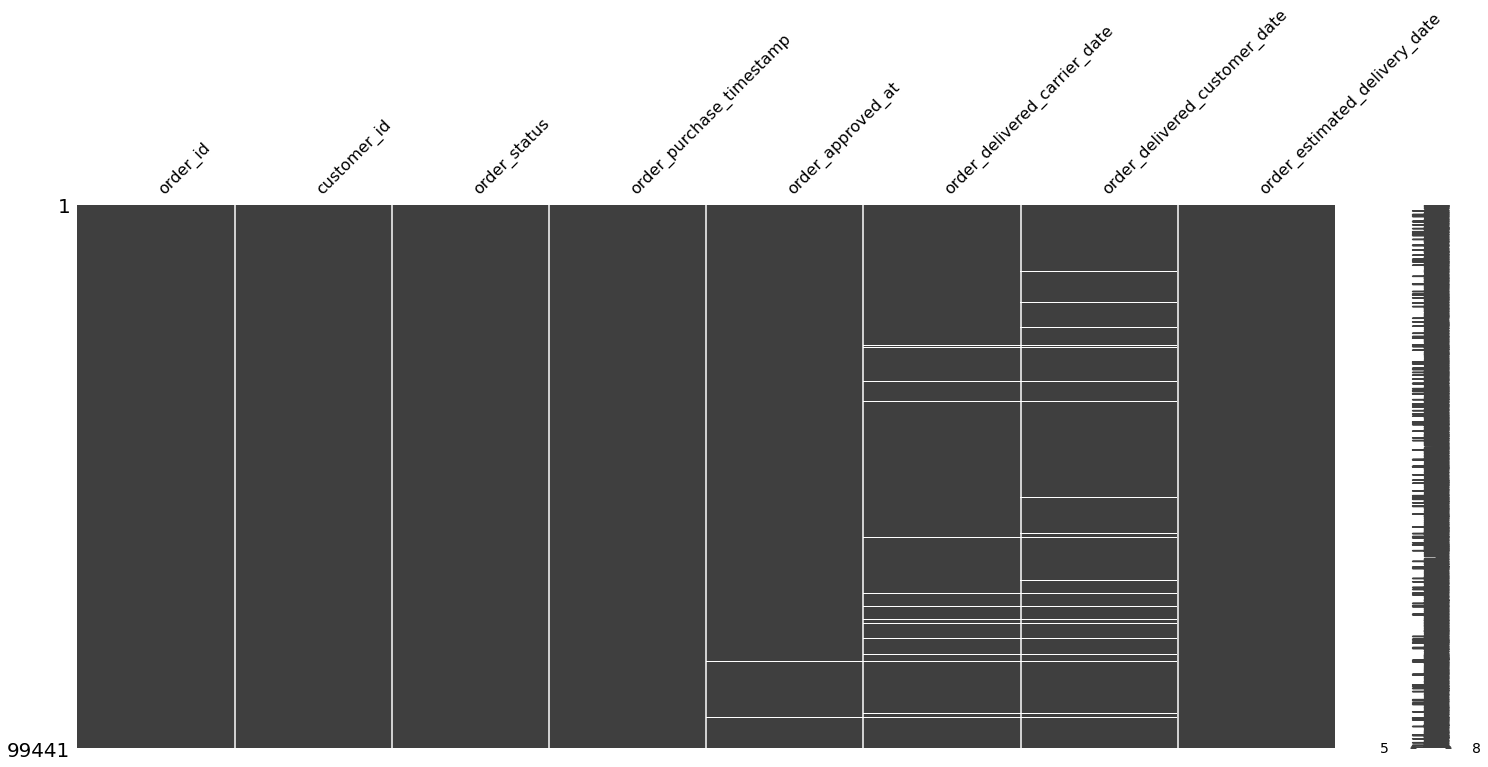

In [22]:
msno.matrix(df_orders)

In [23]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [24]:
products.shape

(32951, 9)

<AxesSubplot:>

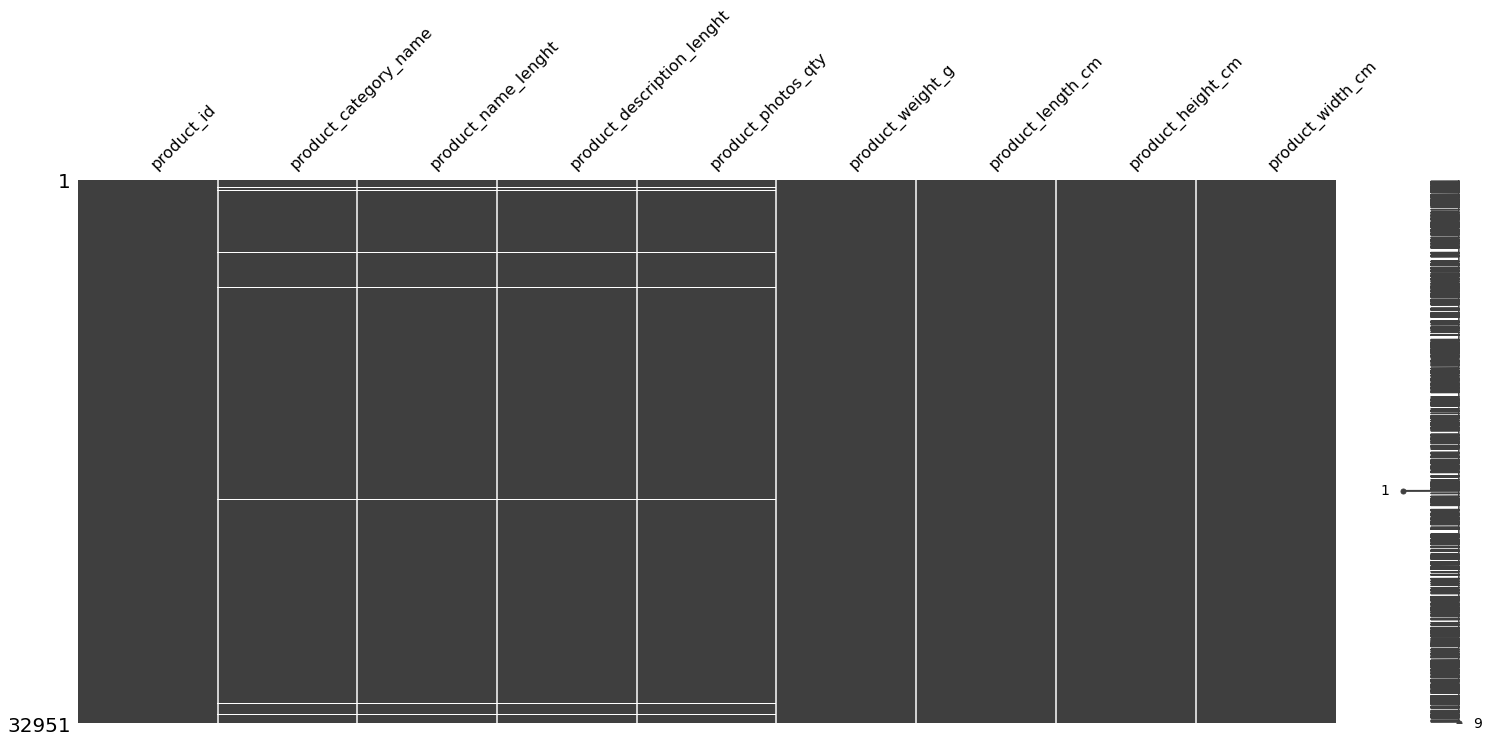

In [25]:
msno.matrix(products)

In [26]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
sellers.shape

(3095, 4)

<AxesSubplot:>

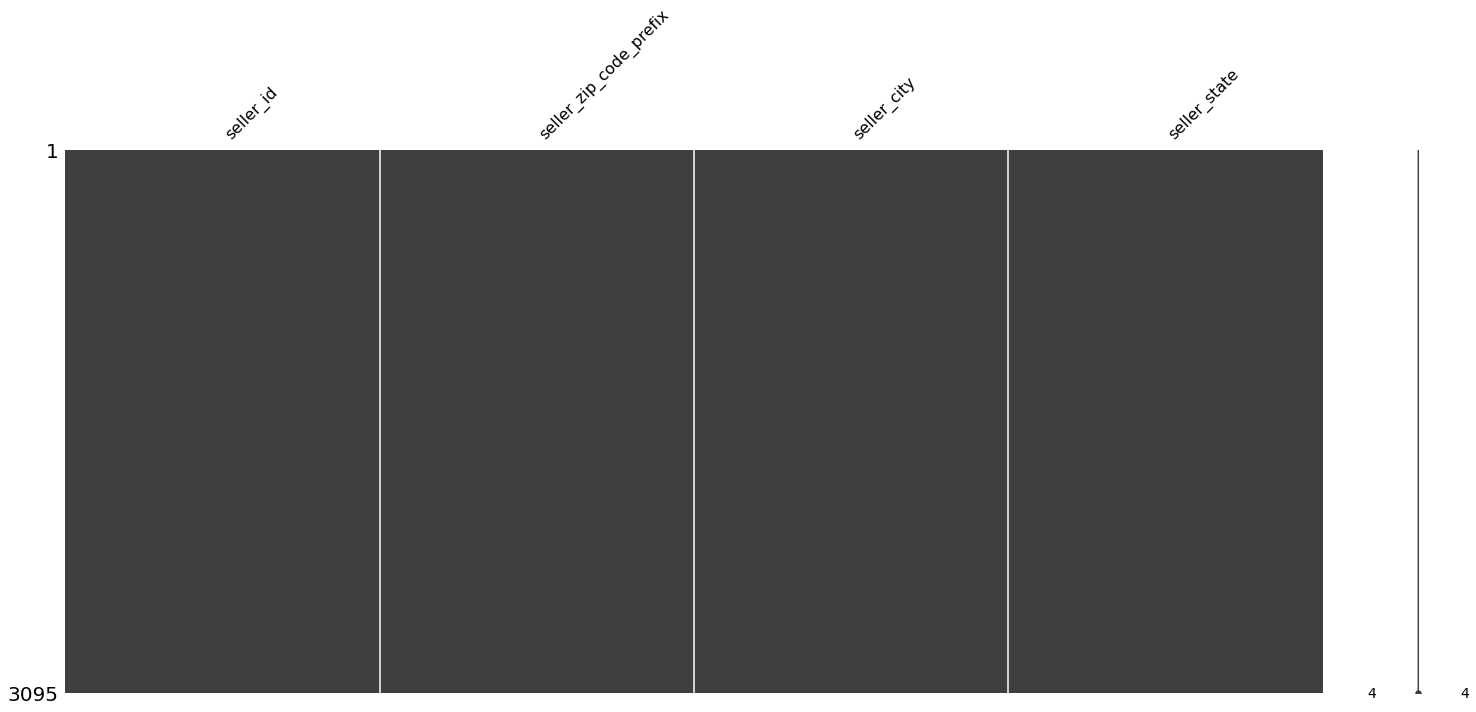

In [28]:
msno.matrix(sellers)

In [29]:
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [30]:
translation.shape

(71, 2)

<AxesSubplot:>

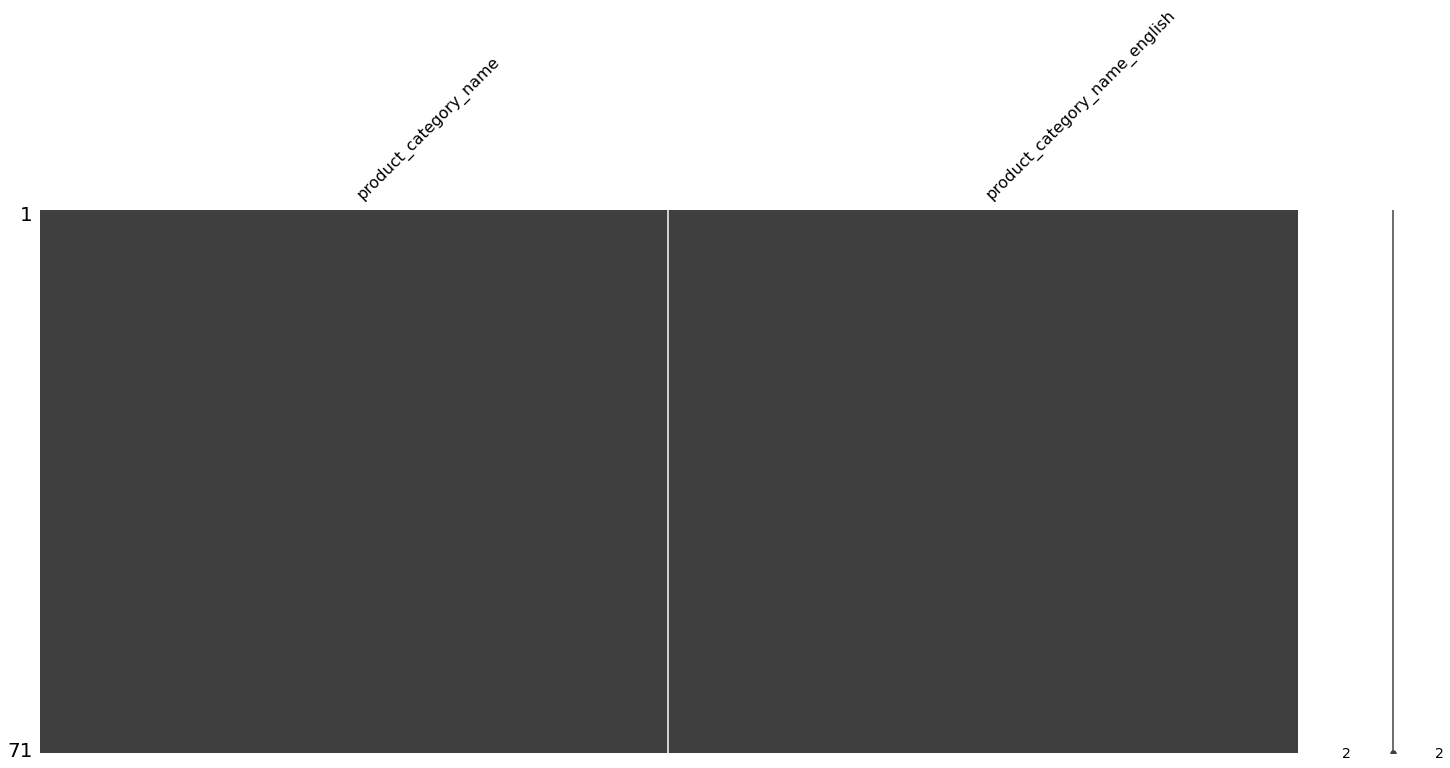

In [31]:
msno.matrix(translation)

# 1 - Analyses des données en lien avec les clients

La table customers contient les variables suivantes :
<li> customer_id: Clé de l'ensemble de données des commandes. Chaque commande a un identifiant client unique. </li>
<li> customer_unique_id: Identifiant unique d'un client .</li>
<li> customer_zip_code_prefix: Cinq premiers chiffres du code postal du client. </li>
<li> customer_city: Nom de la ville du client. </li>
<li> customer_state: Etat du client. </li>

<strong> Etat du client </strong>

In [32]:
customers["customer_state"].value_counts()

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

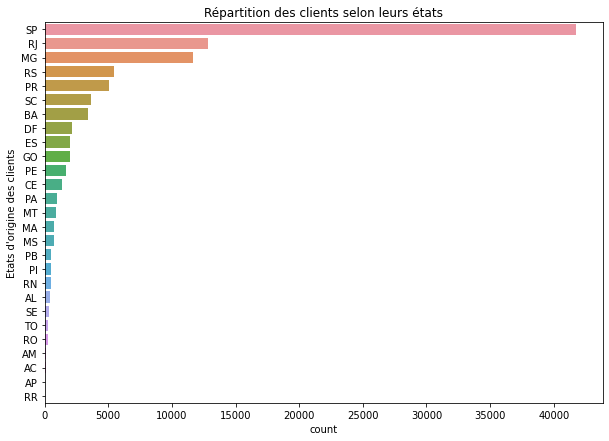

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(y="customer_state", data=customers, order=customers["customer_state"].value_counts().index)
plt.title("Répartition des clients selon leurs états")
plt.ylabel("Etats d'origine des clients")
plt.show()

SP : Sao Paolo, MG : Minas Gerais, RJ : Rio de Janeiro, RS : Rio Grande do Sul, PR : Paranà, SC : Santa Catarina, BA : Bahia, ES : Espírito Santo, GO : Goias, MT : Mato Grosso, PE : Pernambuco, PA : Parà, DF : Distrito Federal, CE : Cearà, MS : Mato Grosso do Sul, MA : Maranhão, AL : Alagoas, PB : Paraíba, PI : Piauí, SE : Sergipe, RN : Rio Grande do Norte, RO : Rondônia, TO : Tocantins, AC : Acre, AM : Amazonas, AP : Amapá, RR : Roraima.

***
**Bilan**
***
Un grand nombre de nos clients vit dans l'état de Sao Paolo. Il s'agit de l'état le plus peuplé du Brésil.<br> 
Il pourrait être intéressant de faire un calcul en pondérant le nombre de clients sur le nombre d'habitants dans les différents états brésiliens.

<strong> Ville de client </strong>

In [39]:
print("Nombre de villes:", customers["customer_city"].nunique())


Nombre de villes: 4119


In [41]:
customers["customer_city"].value_counts()

sao paulo                 15540
rio de janeiro             6882
belo horizonte             2773
brasilia                   2131
curitiba                   1521
                          ...  
formosa da serra negra        1
canto do buriti               1
capela nova                   1
simplicio mendes              1
macuco                        1
Name: customer_city, Length: 4119, dtype: int64

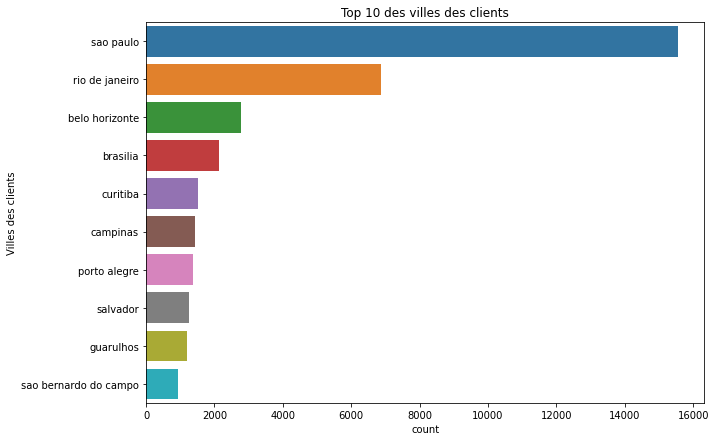

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(y="customer_city", data=customers,order=customers["customer_city"].value_counts().index[:10])
plt.title("Top 10 des villes des clients")
plt.ylabel("Villes des clients")
plt.show()

***
**Bilan:**
***
On observe que les clients vivent à Sao Paolo, qui est la ville la plus peuplée du pays.<br>
Rio de Janeiro qui est la seconde ville la plus peuplée du Brésil. Elle possède 8% de la population du pays. 



<strong> les identifiants des commandes et clients </strong>

In [45]:
print("Nombre d'id customer :", customers["customer_id"].nunique())

Nombre d'id customer : 99441


In [46]:
print("Nombre d'id customer unique:", customers["customer_unique_id"].nunique())

Nombre d'id customer unique: 96096


***
**Bilan**
***
On observe une différence de 3345 id clients entre les id unique et les id clients.<br>
suggestion : Un unique client peut avoir différents commandes. 😃

# 2 - Analyses des commandes

On a crée un dataset unique avec les différentes informations sur les commandes. Ainsi, on peut voir le statut des commandes, les dates d'achat, les dates d'enlèvement chez le vendeur, les dates de livraisons, les dates estimées de livraisons, le nombre de paiements pour une commande, le type de payments, les scores sur les commandes, la valeur de la commande et les frais d'envoi.

In [47]:
df_orders = pd.merge(df_orders, order_payments, on ="order_id", how="left")
df_orders = pd.merge(df_orders , order_reviews, on="order_id", how="left")
df_orders = pd.merge(df_orders , order_items, on="order_id", how="left")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [48]:
df_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

#### Compréhension des différentes variables 

<li> order_id: Order unique identifier </li> 
<li> order_item_id: Numéro séquentiel identifiant le nombre d'articles inclus dans la même commande.</li> 
<li> order_status: référence au statut de la commande (livré, expédié, etc.).</li>
<li> order_purchase_timestamp : Affiche l'horodatage de l'achat.</li>
<li> order_approved_at : Affiche l'horodatage d'approbation du paiement. </li>
<li> order_delivered_carrier_date : Affiche l'horodatage de la commande. Lorsqu'il a été remis au partenaire logistique.</li>
<li> order_delivered_customer_date : Affiche la date réelle de livraison de la commande au client.</li>
<li> order_estimated_delivery_date : Affiche la date de livraison estimée qui a été communiquée au client au moment de l'achat. </li>
<li> price:prix de l article </li>
<li> payment_sequential: Un client peut payer une commande avec plus d'un moyen de paiement. S'il le fait, une séquence sera créée pour accueillir tous les paiements. </li>
<li> payment_type : Mode de paiement choisi par le client. </li> 
<li> payment_installments : Nombre de versements choisi par le client.</li> 
<li> payment_value : Valeur de la transaction. </li> 
<li>review_score : Note allant de 1 à 5 donnée par le client sur une enquête de satisfaction.</li>
<li> review_comment_title : Titre du commentaire de l'avis laissé par le client, en portugais.</li>
<li> review_comment_message : Message de commentaire de l'avis laissé par le client, en portugais. </li>
<li> review_creation_date : Affiche la date à laquelle l'enquête de satisfaction a été envoyée au client. </li> 
<li>review_answer_timestamp : Affiche  la date de réponse à l'enquête de satisfaction. </li>

In [50]:
nRow, nCol = df_orders.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 119143 lignes et 24 colonnes.


In [53]:
sum(df_orders.duplicated())

0

In [56]:
# 1. Nombre de valeurs manquantes totales
tot_nan = df_orders.isna().sum().sum()
nb_donnees_tot = np.product(df_orders.shape)
pourc_nan_tot = round((tot_nan / nb_donnees_tot) * 100, 2)
print(f'Valeurs manquantes : {tot_nan} NaN pour {nb_donnees_tot} données ({pourc_nan_tot} %)')

Valeurs manquantes : 188734 NaN pour 2859432 données (6.6 %)


-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


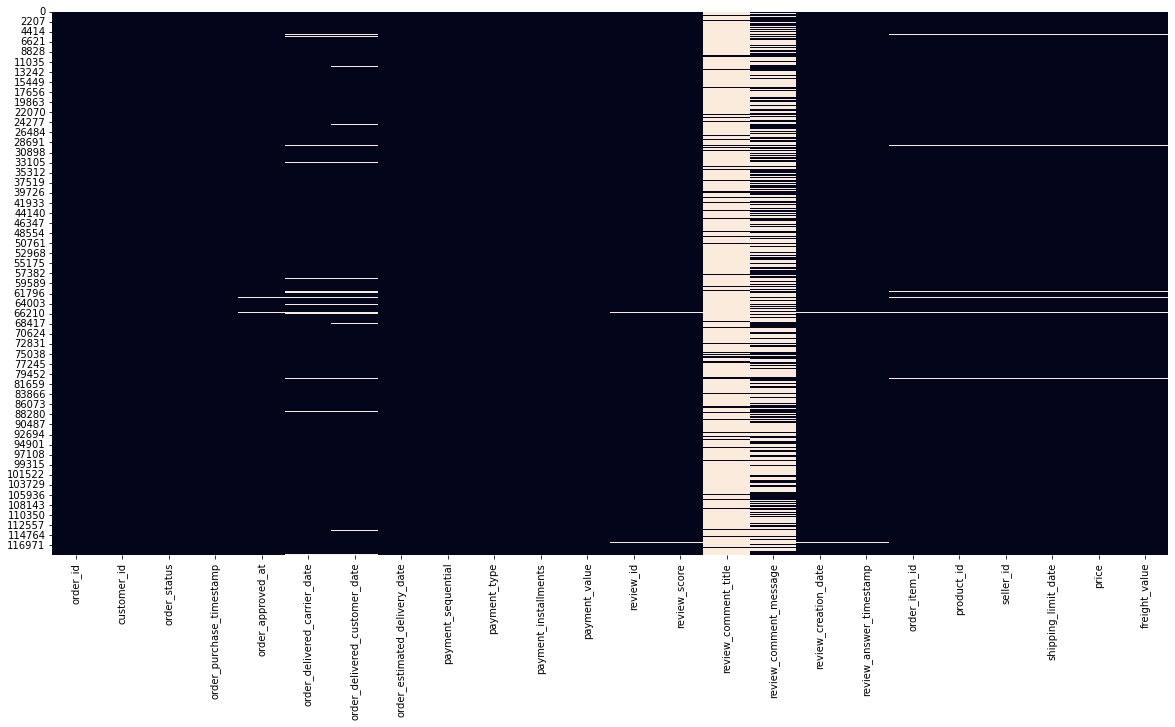

In [57]:
print("-------------------------------------------------------------")
print("Heatmap de visualisation des valeurs manquantes")
# 3. Heatmap de visualisation des valeurs manquantes
plt.figure(figsize=(20, 10))
sns.heatmap(df_orders.isna(), cbar=False)
plt.show()

<AxesSubplot:>

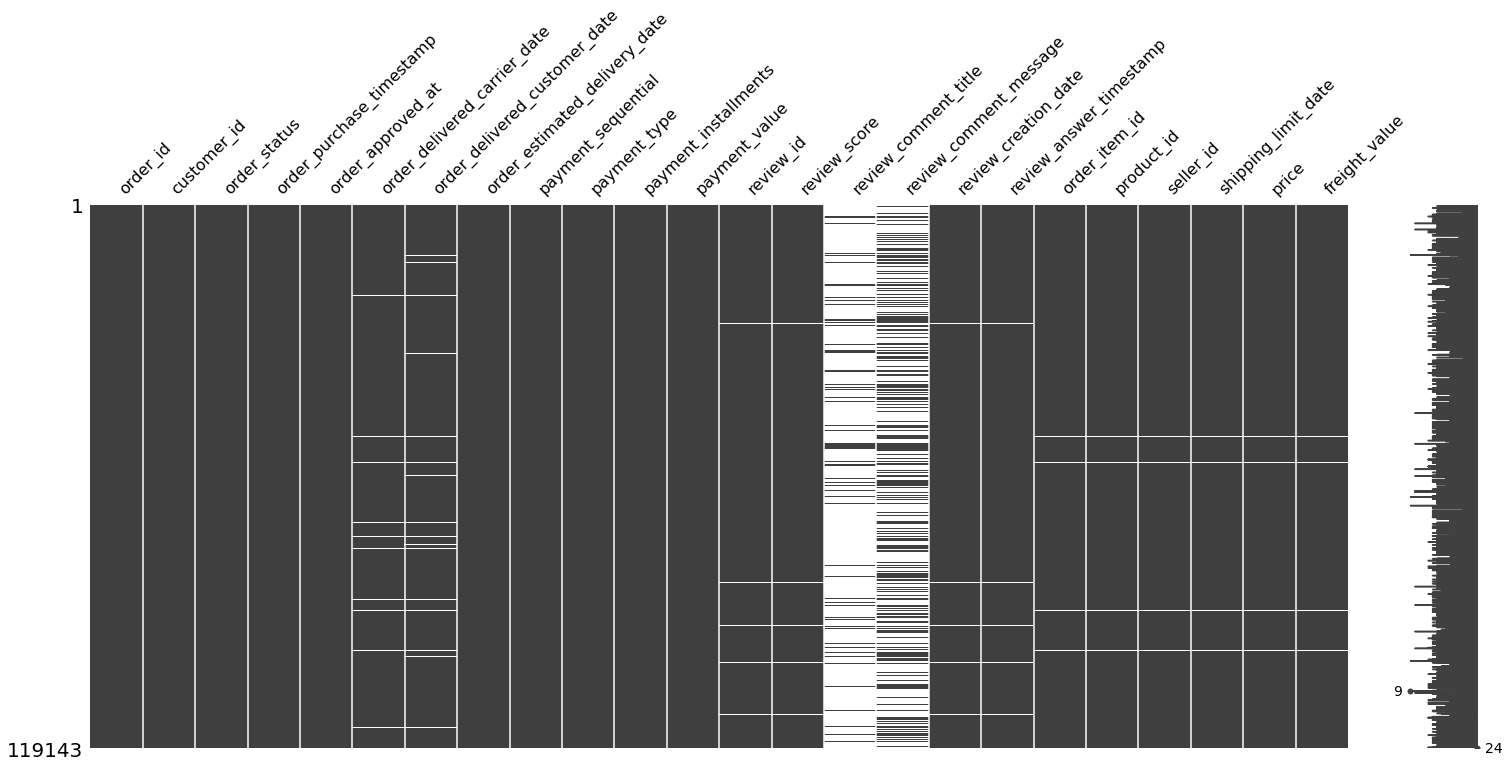

In [55]:
msno.matrix(df_orders)

In [44]:
df_orders.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154
review_comment_message            68898
review_creation_date                997
review_answer_timestamp             997
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
dtype: int64

In [59]:
df_orders["order_id"].nunique()

99441

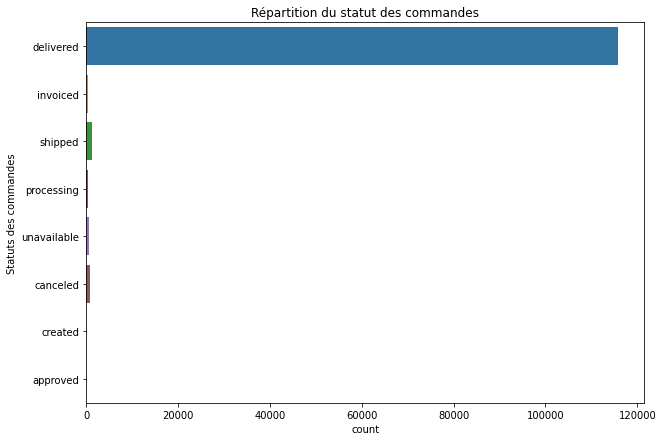

In [60]:
plt.figure(figsize=(10,7))
sns.countplot(y="order_status", data=df_orders)
plt.title("Répartition du statut des commandes")
plt.ylabel("Statuts des commandes")
plt.show()

In [43]:
df_orders['order_status'].value_counts()

delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

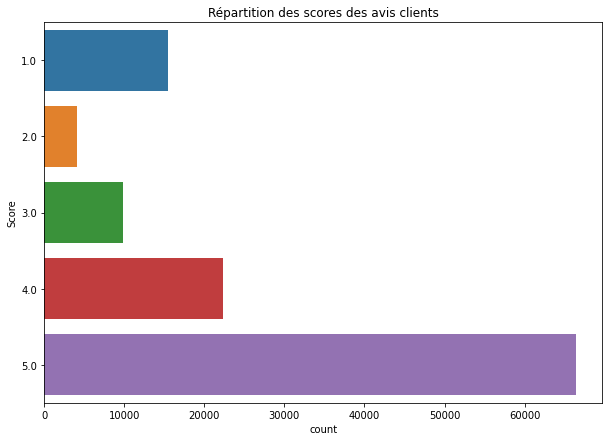

In [62]:
plt.figure(figsize=(10, 7))
sns.countplot(y="review_score", data=df_orders)
plt.title("Répartition des scores des avis clients")
plt.ylabel("Score")
plt.show()


La majorité des clients a attribué la note maximale à leurs commandes (5). Il y a peu d'avis négatif.

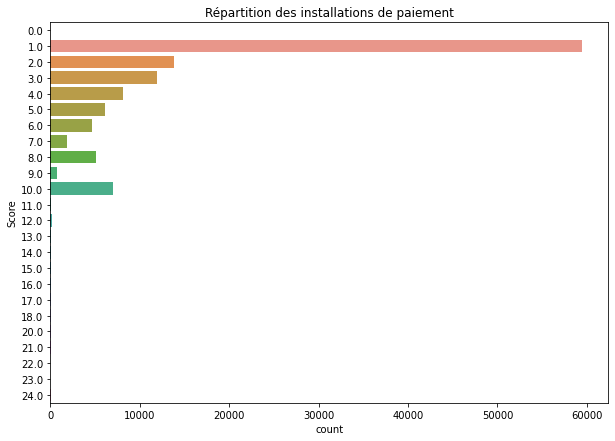

In [63]:
plt.figure(figsize=(10, 7))
sns.countplot(y="payment_installments", data=df_orders)
plt.title("Répartition des installations de paiement")
plt.ylabel("Score")
plt.show()

In [56]:
df_orders["payment_type"].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined',
       nan], dtype=object)

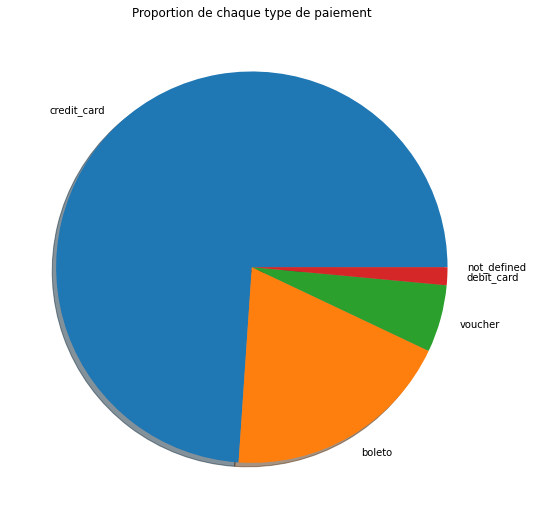

In [65]:
# Pieplot des différents moyens de paiements

fig = plt.figure(5, figsize=(9,9))
plt.pie(order_payments["payment_type"].value_counts(),
        labels=order_payments["payment_type"].unique(), shadow=True)
plt.title("Proportion de chaque type de paiement")
plt.show()

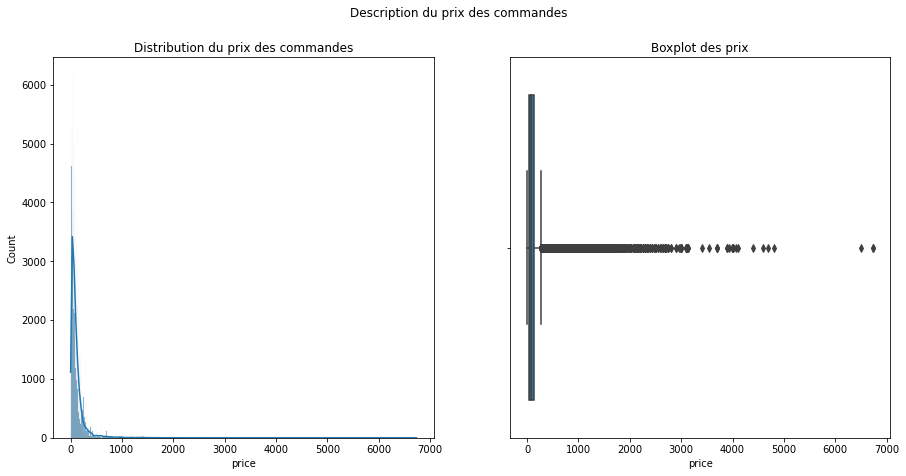

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
fig.suptitle('Description du prix des commandes')

sns.histplot(ax=axes[0],x="price", data=df_orders, kde=True)
axes[0].set_title("Distribution du prix des commandes")

sns.boxplot(ax=axes[1], x="price", data=df_orders)
axes[1].set_title("Boxplot des prix")

plt.show()

Les commandes sont comprises entre 0 et 7000 Réaux brésiliens. Le prix des commandes ne semblent pas suivre une loi normale.

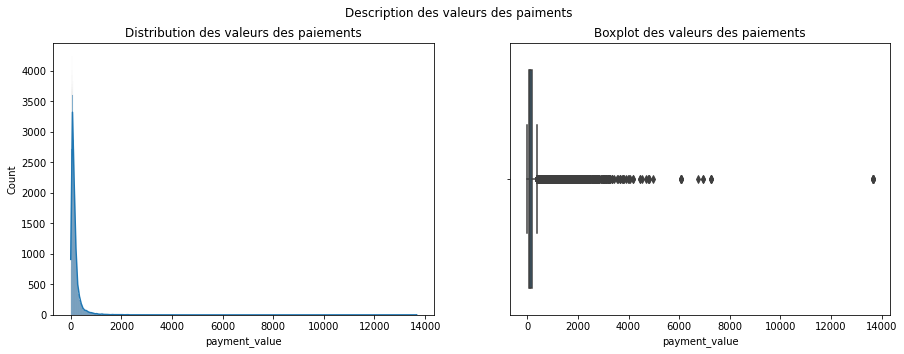

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des valeurs des paiments')

sns.histplot(ax=axes[0],x="payment_value", data=df_orders, kde=True)
axes[0].set_title("Distribution des valeurs des paiements")

sns.boxplot(ax=axes[1], x="payment_value", data=df_orders)
axes[1].set_title("Boxplot des valeurs des paiements")

plt.show()

La valeur maximale des paiements est de 14 000 Réaux brésiliens.

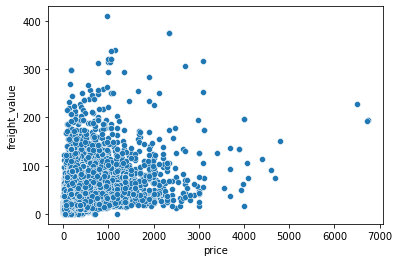

In [68]:
sns.scatterplot(x="price", y="freight_value", data=df_orders)
plt.show()

Il ne semble pas avoir de lien entre les prix des commandes et les frais de port.

# 3 - Analyses des produits et catégorie

Nous allons merger la table de produits avec la table de traduction pour avoir les noms de catégories en anglais.

In [69]:
df_products = pd.merge(products, translation, on="product_category_name")
df_products.drop("product_category_name", axis=1, inplace=True)
df_products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


On a crée un dataset contenant les informations des produits vendus. On a associé la traduction des catégories.


In [73]:
nRow, nCol = df_products.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 32328 lignes et 9 colonnes.


In [74]:
df_products.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [77]:
df_products.isnull().sum()

product_id                       0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 1
product_length_cm                1
product_height_cm                1
product_width_cm                 1
product_category_name_english    0
dtype: int64

On observe quelques valeurs manquantes pour les caractéristiques physiques de produits (poids, longueurs, hauteurs, largeurs).mm

In [79]:
sum(df_products.duplicated())

0

On n'a aucune valeur dupliquée sur ce jeu de données.

# Descriptions des variables en lien avec les produits

In [138]:
df_products["product_category_name_english"].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'home_app

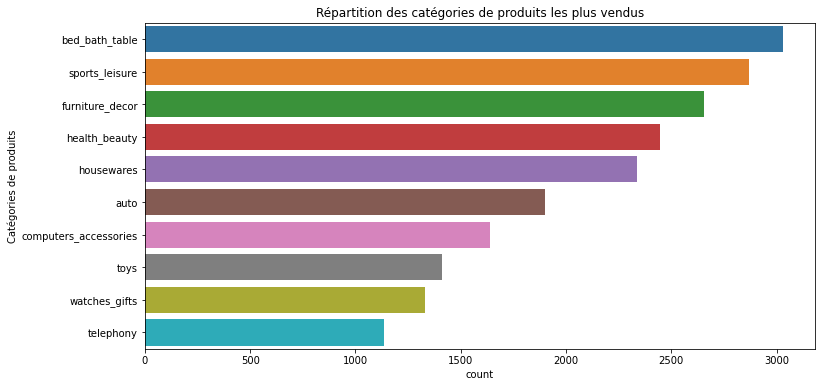

In [80]:
plt.figure(figsize=(12, 6))
sns.countplot(y="product_category_name_english", data=df_products, 
             order=df_products["product_category_name_english"].value_counts().index[:10])
plt.ylabel("Catégories de produits")
plt.title("Répartition des catégories de produits les plus vendus")
plt.show()

La catégorie la plus vendue est le linge de maison, suivie par les sports et loisirs et la décoration.

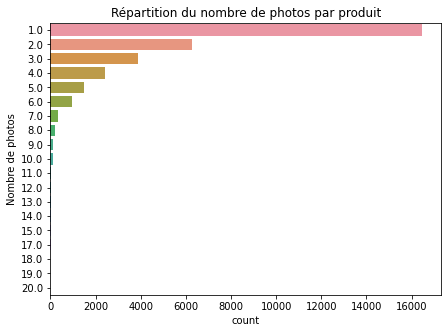

In [81]:
plt.figure(figsize=(7, 5))
sns.countplot(y="product_photos_qty", data=df_products)
plt.ylabel("Nombre de photos")
plt.title("Répartition du nombre de photos par produit")
plt.show()

En général, chaque produit est accompagné par une photo. Certains produits ont jusqu'à 11 photos.

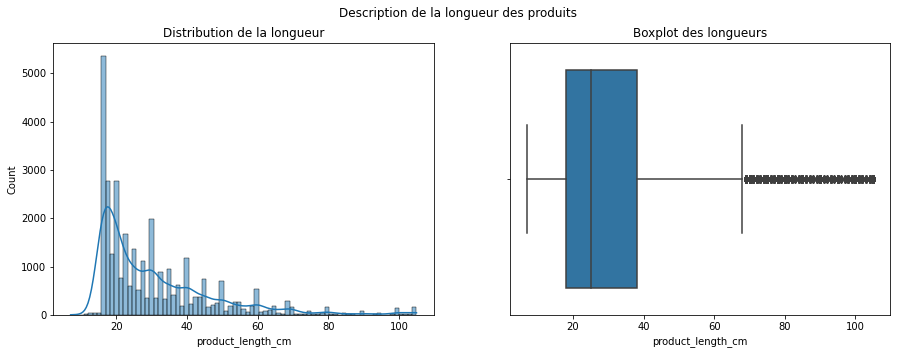

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la longueur des produits')

sns.histplot(ax=axes[0],x="product_length_cm", data=df_products, kde=True)
axes[0].set_title("Distribution de la longueur")

sns.boxplot(ax=axes[1], x="product_length_cm", data=df_products)
axes[1].set_title("Boxplot des longueurs")

plt.show()

La longueur des produits est comprise entre 0 et un peu plus de 100 cm. La majorité des produits a une longueur d'environ 20 cm.

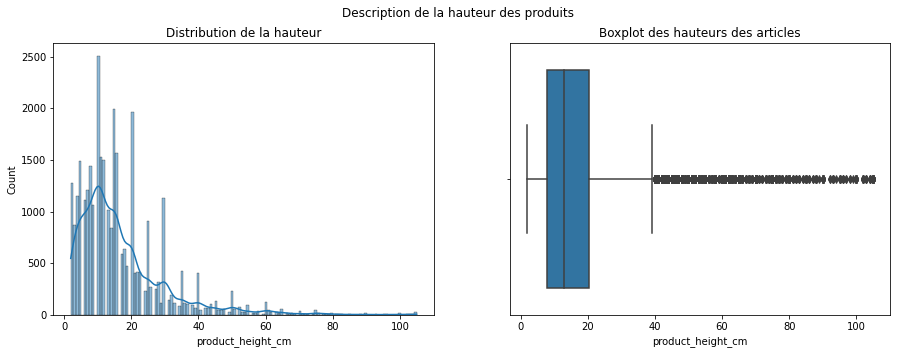

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la hauteur des produits')

sns.histplot(ax=axes[0],x="product_height_cm", data=df_products, kde=True)
axes[0].set_title("Distribution de la hauteur")

sns.boxplot(ax=axes[1], x="product_height_cm", data=df_products)
axes[1].set_title("Boxplot des hauteurs des articles")

plt.show()

La hauteur des produit se situe entre 0 et un peu plus de 100 cm. La hauteur moyenne est comprise entre 15 et 20 cm.

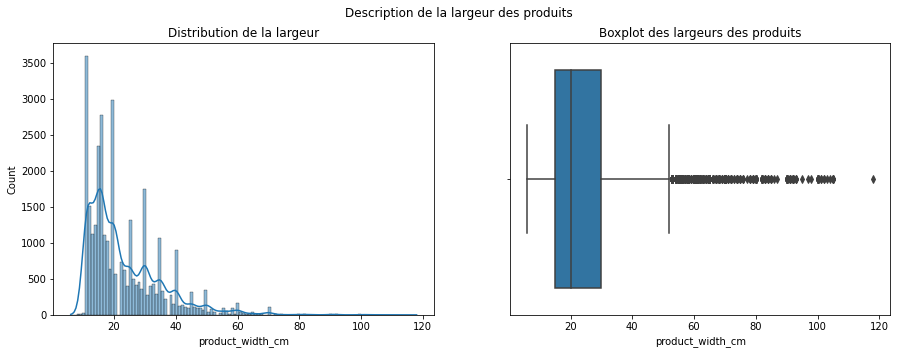

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la largeur des produits')

sns.histplot(ax=axes[0],x="product_width_cm", data=df_products, kde=True)
axes[0].set_title("Distribution de la largeur")

sns.boxplot(ax=axes[1], x="product_width_cm", data=df_products)
axes[1].set_title("Boxplot des largeurs des produits")

plt.show()

In [85]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32328.000000,32328.000000,32328.000000,32327.000000,32327.000000,32327.000000,32327.000000
mean,48.474078,771.520168,2.188815,2276.960807,30.856498,16.955950,23.208464
std,10.246388,635.180062,1.736746,4279.734063,16.958460,13.637246,12.080665
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,20.500000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


# 4 - Analyse des vendeurs

In [86]:
df_sellers = pd.merge(geolocalisation , sellers ,
                        right_on=["seller_zip_code_prefix", "seller_city", "seller_state"], 
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_sellers.drop(["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], axis=1, inplace=True)
df_sellers = df_sellers[['seller_id', "seller_zip_code_prefix", "seller_city", "seller_state", "geolocation_lat", "geolocation_lng"]]
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431


In [88]:
nRow, nCol = df_sellers.shape
print(f'Le jeu de données contient {nRow} lignes et {nCol} colonnes.')

Le jeu de données contient 385721 lignes et 6 colonnes.


In [89]:
df_sellers.drop_duplicates(subset="seller_id", inplace=True)

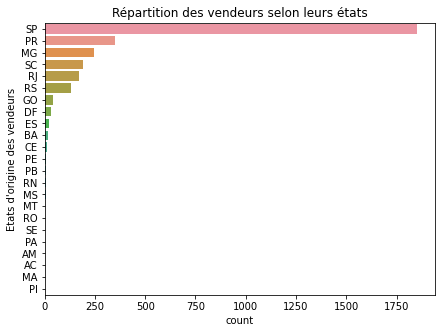

In [91]:
plt.figure(figsize=(7,5))
sns.countplot(y="seller_state", data=df_sellers, order=df_sellers["seller_state"].value_counts().index)
plt.title("Répartition des vendeurs selon leurs états")
plt.ylabel("Etats d'origine des vendeurs")
plt.show()

***
**Remarque**
***
La plupart des vendeurs se situent dans l'état de Sao Paolo et de Minas Geiras.

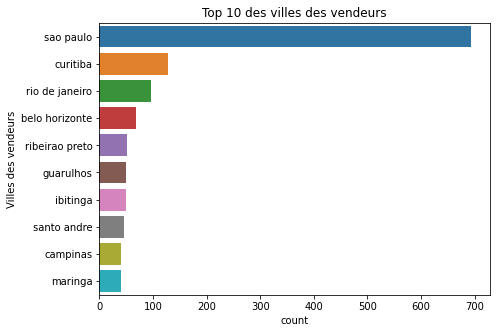

In [151]:
plt.figure(figsize=(7,5))
sns.countplot(y="seller_city", data=df_sellers, order=df_sellers["seller_city"].value_counts().index[:10])
plt.title("Top 10 des villes des vendeurs")
plt.ylabel("Villes des vendeurs")
plt.show()

La ville qui comptabilise le plus de vendeurs est Sao Paolo suivie par Curitiba.

In [152]:
print("Nombre d'id seller :", df_sellers["seller_id"].nunique())

Nombre d'id seller : 3095


In [153]:
print("Nombre de villes:", df_sellers["seller_city"].nunique())

Nombre de villes: 611


***
**Bilan**
***
On enregistre 3095 vendeurs répartis dans 611 villes différentes. 

# 5 - Analyses des produits et des ventes

In [92]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [93]:
df_prod_orders = pd.merge(df_products, df_orders, on="product_id", how="left")
df_prod_orders.head()


,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,...,5.0,Vale a pena,Super adooorei o delineador ele é bem preto e ...,2018-04-28 00:00:00,2018-05-04 00:55:02,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,5fa78e91b5cb84b6a8ccc42733f95742,...,2.0,NaN,NaN,2017-12-14 00:00:00,2017-12-17 02:57:05,1.0,7040e82f899a04d1b434b795a43b4617,2017-12-14 16:33:14,16.90,7.78
2,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery,048cc42e03ca8d43c729adf6962cb348,...,5.0,NaN,O produto que chegou é mais bonito do que eu e...,2017-11-24 00:00:00,2017-11-24 18:34:45,1.0,7040e82f899a04d1b434b795a43b4617,2017-11-23 21:31:31,16.90,7.78
3,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,a84a0bd528e053f6b266e21bb1111e3f,...,5.0,Muito bom !!,Recomendo tanto o site lannister quanto a loja...,2018-07-11 00:00:00,2018-07-11 10:06:10,1.0,620c87c171fb2a6dd6e8bb4dec959fc6,2018-07-09 20:31:35,319.90,15.45
4,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery,24b1c4d88fdb7a2dc87f8ecc7d8f47f1,...,5.0,NaN,ótimo produto e ótima loja para comprar pelo s...,2017-08-09 00:00:00,2017-08-09 19:30:09,1.0,fe2032dab1a61af8794248c8196565c9,2017-08-03 09:50:14,339.00,17.13


In [94]:
df_prod_orders.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'order_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [95]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


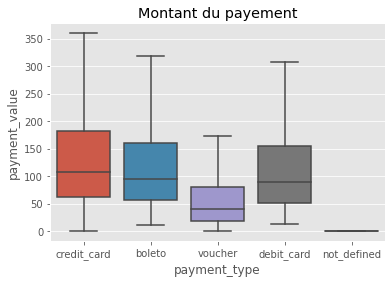

In [169]:
# Boxplot pour chaque type de paiement
plt.title("Montant du payement")
sns.boxplot(data=order_payments, y="payment_value",
            x="payment_type", showfliers=False)
plt.show()

<li> Voucher signifie bon d achats, le payement moyen par ce type de payment est plus faible que les autres. </li>

<li> Boleto est un moyen de payment en espèce</li>

# Données sur les "items"

In [172]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [174]:
# Description des données
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<li> order_item_id est le nombre d'objets dans une même commande. </li>
<li> freight_value est le coût de livraison. </li>
<li> shipping_limit_date correspond à la date d'expédition auprès du transporteur. </li>

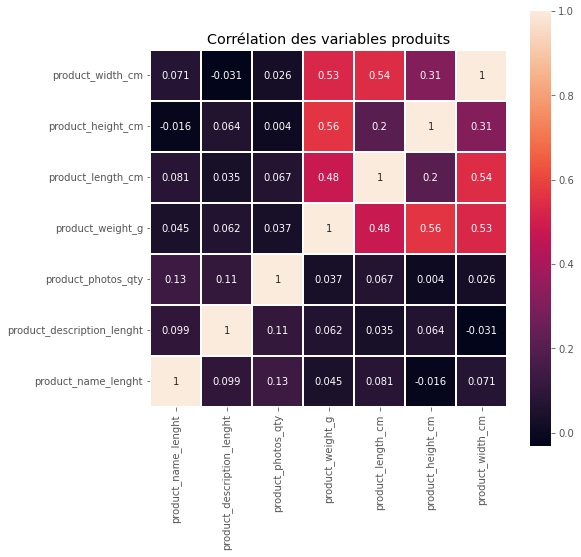

In [176]:
# Matrice de corrélation
matrix_corr = products.corr()
fig = plt.figure(1, figsize=(8, 8))
# Heatmap de la matrice de corrélation
sns.heatmap(matrix_corr, square=True, linewidths=0.1, annot=True)
plt.ylim(0, matrix_corr.shape[0])
plt.title("Corrélation des variables produits")
plt.show()

Le poids est évidemment corrélé aux dimensions du produit et donc du volume.